# Scikit-Learn

***

This notebook provides an clear and concise overview of the [scikit-learn python library](https://scikit-learn.org/stable/).

Scikit-Learn is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.

## Supervised Learning

***

## Unsupervised Learning

***

## Supervised Learning Algorithms

***

[Classification analysis](https://www.indicative.com/resource/classification-analysis/) is a data analysis task within data-mining, that identifies and assigns categories to a collection of data to allow for more accurate analysis. The classification method makes use of mathematical techniques such as decision trees, linear programming, neural network and statistics.

### Classification Analysis: Wine Quality Data Set

[Wine quality dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/) from the [UC Irvine machine learning repository](https://archive.ics.uci.edu/ml/index.php).

Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests.

I will be using the red wine dataset.

***

### Setup

In [1]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neaighbours.
import sklearn.neighbors as nei

# Helper functions.
import sklearn.model_selection as mod

# Fancier, statistical plots.
import seaborn as sns

In [2]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

<br>

### The Red Wine Quality Dataset

In [3]:
# Load the red wine data set from a URL.
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [4]:
# Display the data
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [5]:
# Summary statistics.
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [6]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# Correlation
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

In [8]:
# Create generic wine quality labels
bins = (2, 6.5, 8)
labels = ['bad', 'good']
df['quality'] = pd.cut(x = df['quality'], bins = bins, labels = labels)

In [9]:
# Count how many wines fit the labels
df['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

<br>

### Visualize

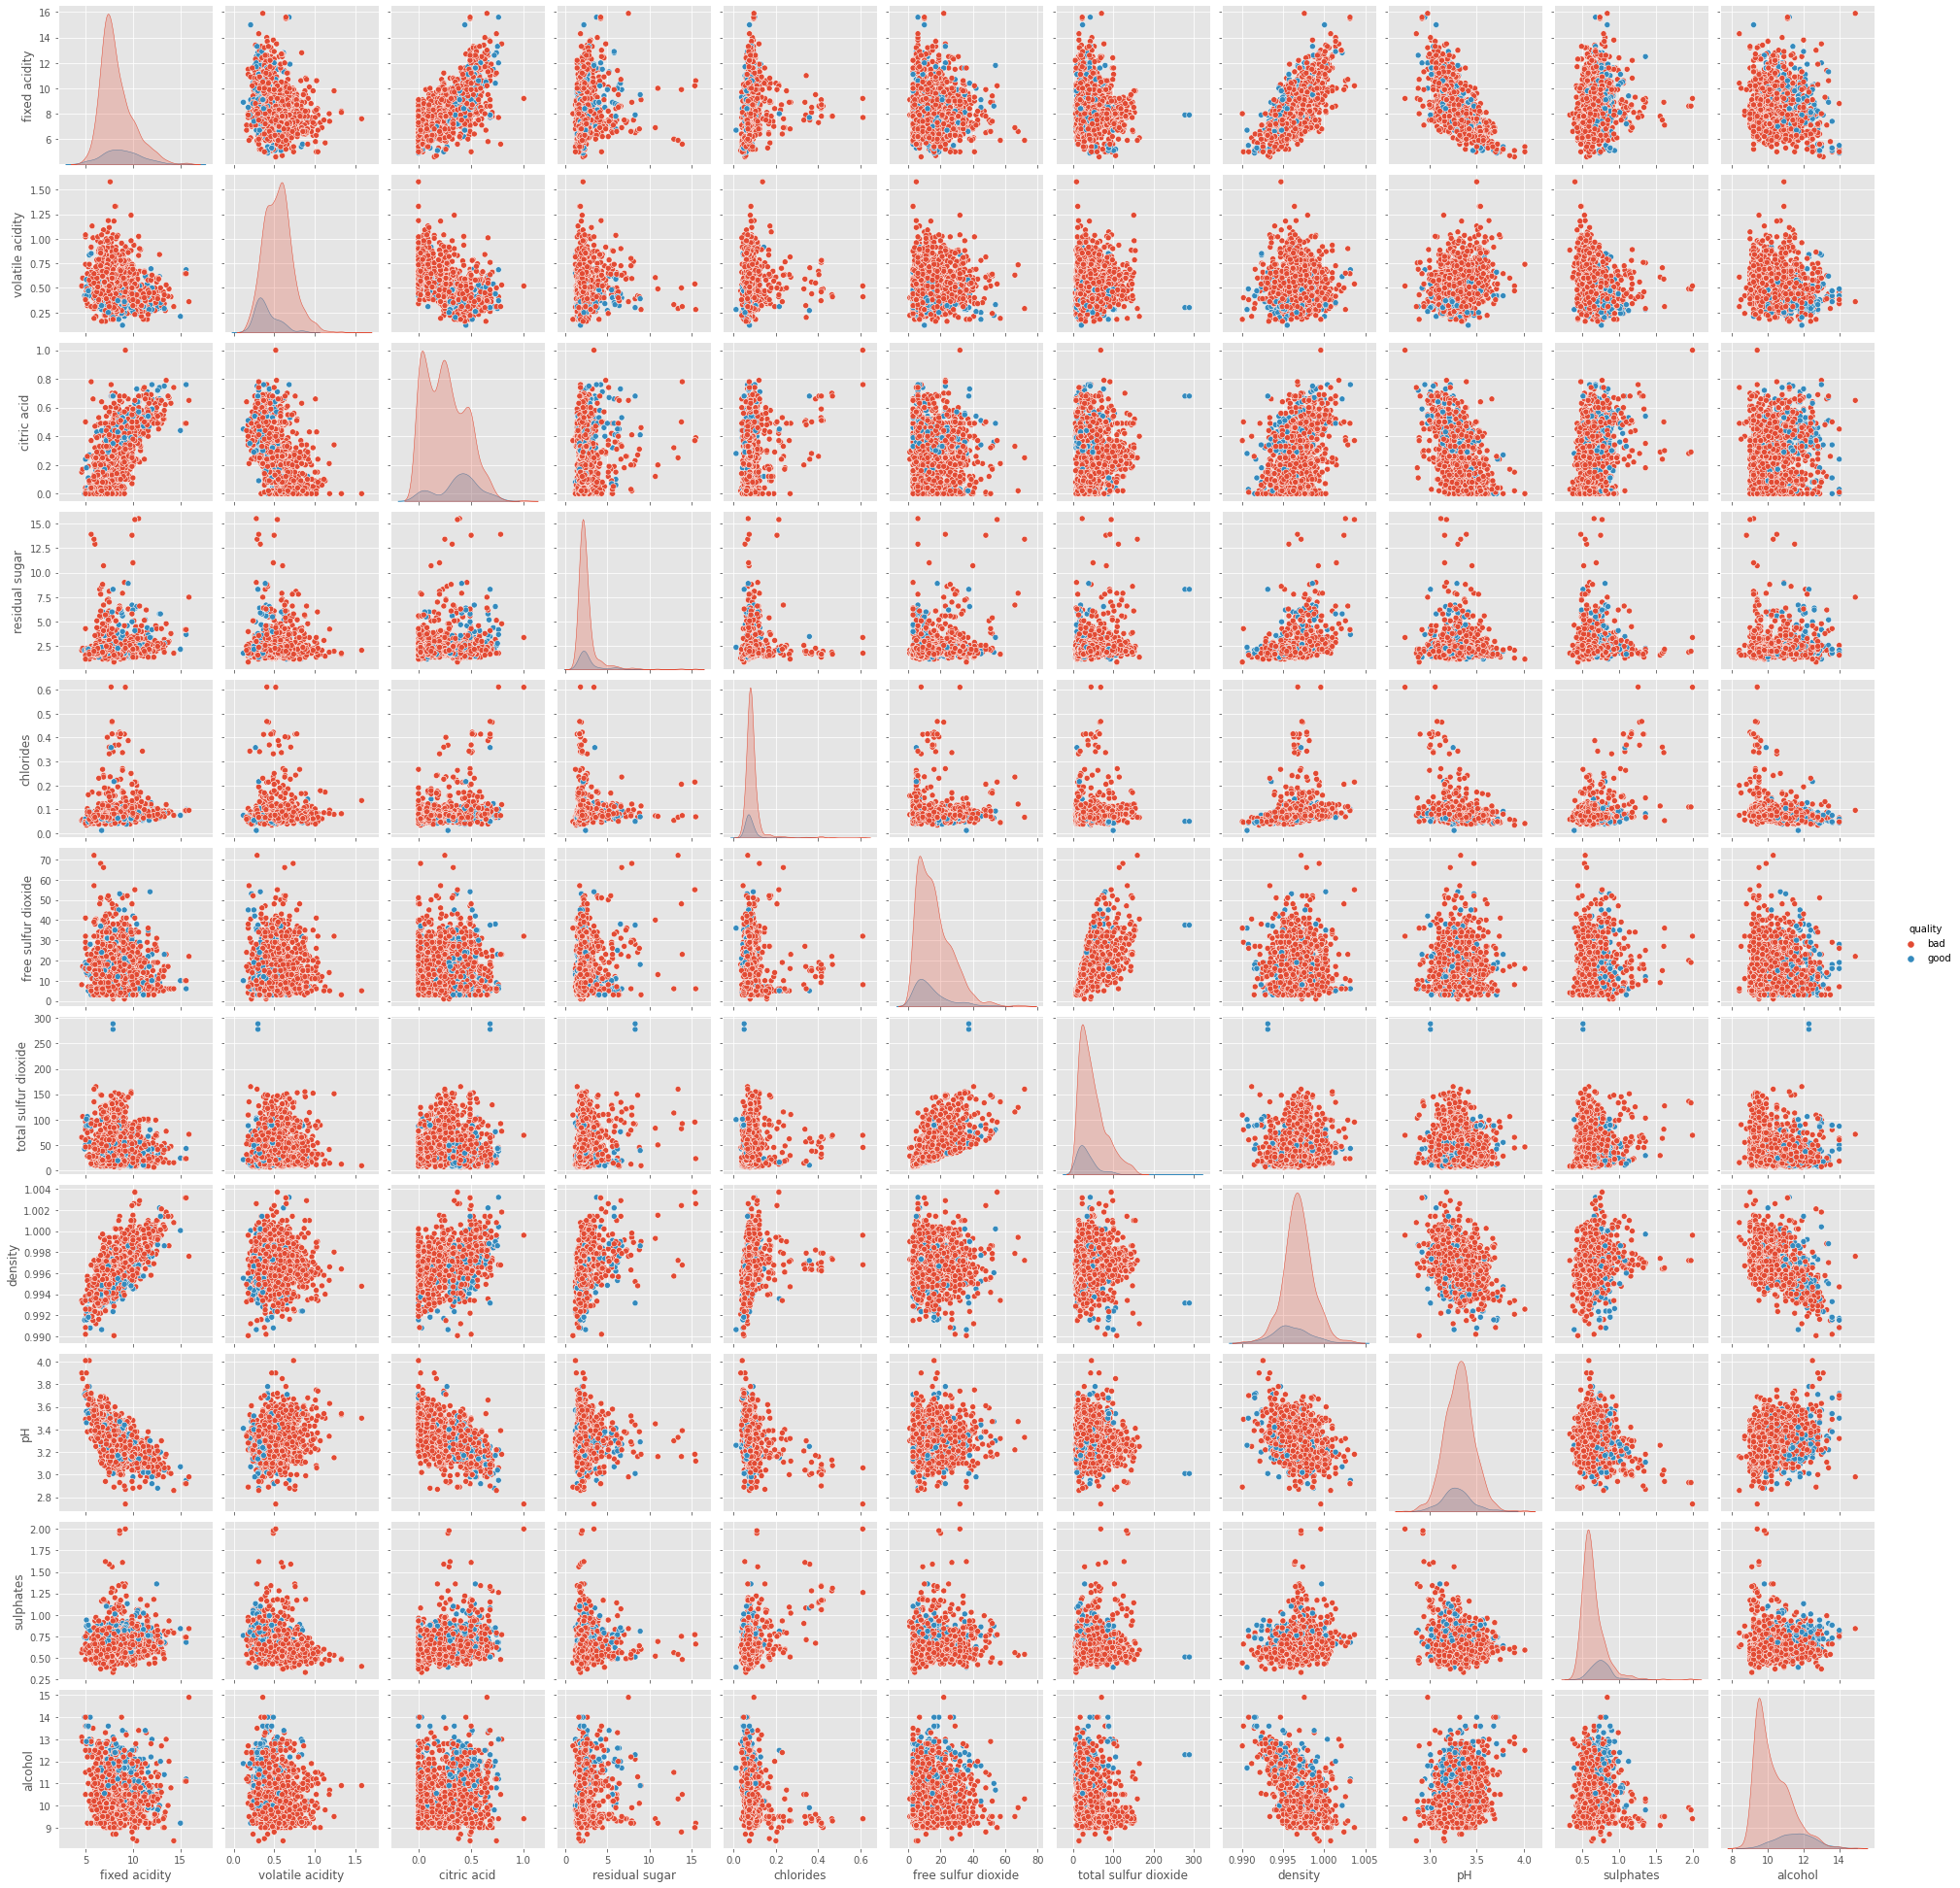

In [10]:
# Scatter plots and kdes.
sns.pairplot(df, hue='quality');

<br>

#### Two Dimensions

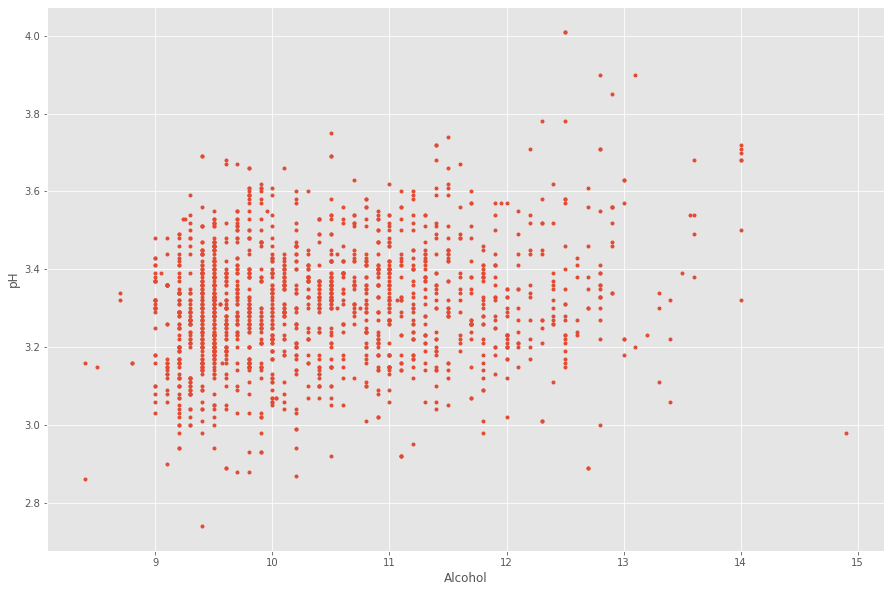

In [11]:
# New figure.
fig, ax = plt.subplots()

# Scatter plot.
ax.plot(df['alcohol'], df['pH'], '.')

# Set axis labels.
ax.set_xlabel('Alcohol');
ax.set_ylabel('pH');

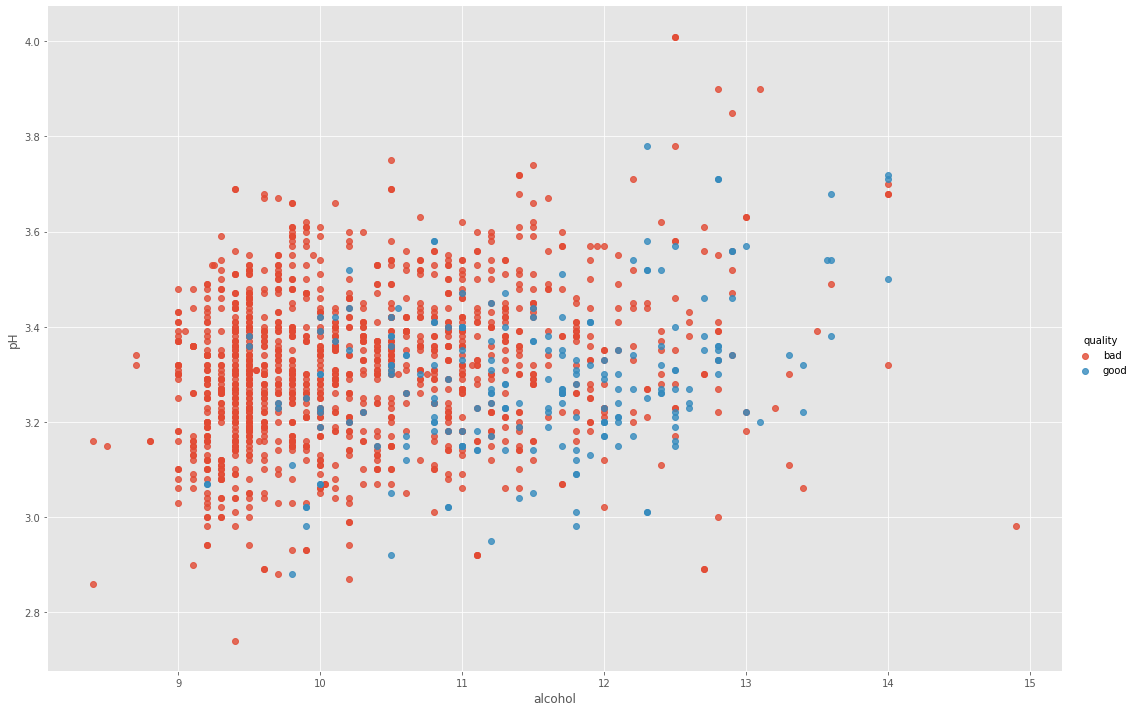

In [12]:
# Seaborn is great for creating complex plots with one command.
sns.lmplot(x="alcohol", y="pH", hue='quality', data=df, fit_reg=False, height=10, aspect=1.5);

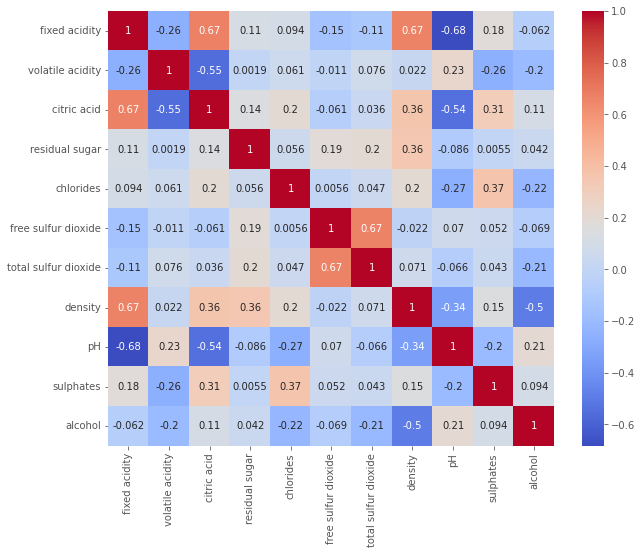

In [13]:
# Heatmap
corr = df.corr()
#Plot figsize
plt.figure(figsize=(10, 8))
# Generate heat map
sns.heatmap(corr,annot=True,cmap="coolwarm")
# Show plot
plt.show()

#### Using PyPlot

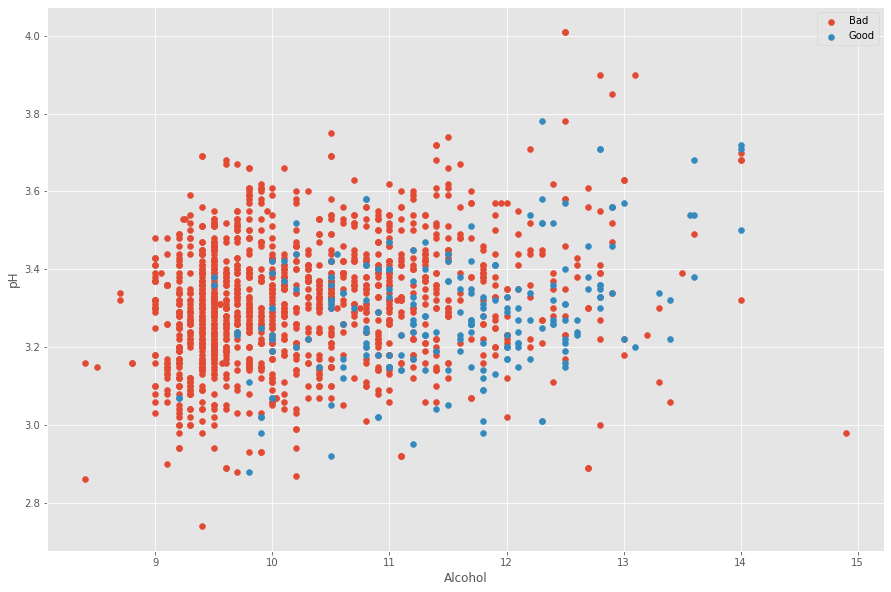

In [14]:
# Segregate the data.
bad = df[df['quality'] == 'bad']
good = df[df['quality'] == 'good']

# New plot.
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(bad['alcohol'], bad['pH'], label='Bad')
ax.scatter(good['alcohol'], good['pH'], label='Good')

# Show the legend.
ax.set_xlabel('Alcohol')
ax.set_ylabel('pH')
ax.legend();

In [15]:
# How the segregation works
df['quality'] == 'bad'

0       True
1       True
2       True
3       True
4       True
        ... 
1594    True
1595    True
1596    True
1597    True
1598    True
Name: quality, Length: 1599, dtype: bool

In [16]:
df[df['quality'] == 'bad'].head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality  
0      9.4     bad  
1      9.8     bad  
2      9.8     bad  
3      9.8     bad  
4      9.4     bad

#### Using groupby()

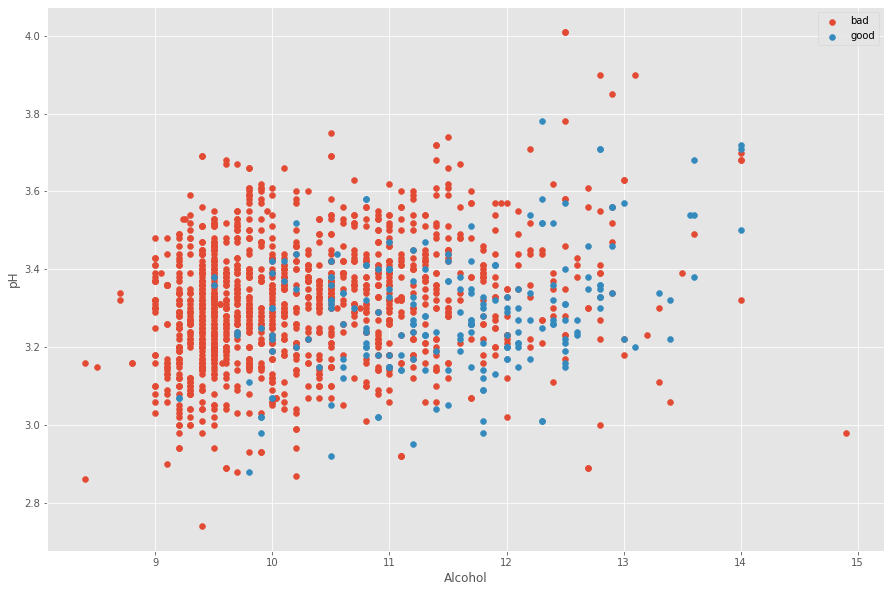

In [17]:
# New plot.
fig, ax = plt.subplots()

# Using pandas groupby().
for quality, data in df.groupby('quality'):
    ax.scatter(data['alcohol'], data['pH'], label=quality)

# Show the legend.
ax.set_xlabel('Alcohol')
ax.set_ylabel('pH')
ax.legend();

In [18]:
# Group by typically takes a categorical variable.
x = df.groupby('quality')
x

In [19]:
# Pivot tables.
x.mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
bad           8.236831          0.547022     0.254407        2.512120   
good          8.847005          0.405530     0.376498        2.708756   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
bad       0.089281            16.172214             48.285818  0.996859   
good      0.075912            13.981567             34.889401  0.996030   

               pH  sulphates    alcohol  
quality                                  
bad      3.314616   0.644754  10.251037  
good     3.288802   0.743456  11.518049

In [20]:
# Looping through groupby().
for i, j in x:
    print()
    print(f"i is: '{i}'")
    print(f"j is:\n{j[:3]}")
    print()


i is: 'bad'
j is:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol quality  
0      9.4     bad  
1      9.8     bad  
2      9.8     bad  


i is: 'good'
j is:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
7             7.3              0.65         0.00             1.2      0.065   
8             7.8              0.58         0.02             2.0      0.073   
16            8.5            

<br>

### Test and Train Split

In [21]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [22]:
# Show some training data.
train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
211             8.0             0.725         0.24             2.8      0.083   
168             6.8             0.630         0.07             2.1      0.089   
1208            7.2             0.360         0.46             2.1      0.074   
981             9.5             0.860         0.26             1.9      0.079   
1503            6.2             0.440         0.39             2.5      0.077   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
211                  10.0                  62.0  0.99685  3.35       0.56   
168                  11.0                  44.0  0.99530  3.47       0.55   
1208                 24.0                  44.0  0.99534  3.40       0.85   
981                  13.0                  28.0  0.99712  3.25       0.62   
1503                  6.0                  14.0  0.99555  3.51       0.69   

      alcohol quality  
211      10.0     bad  
168      10.4     bad  
1208     11.0    good  
981      10.0     bad  
1503     11.0     bad

In [23]:
# The indices of the train array.
train.index

Int64Index([ 211,  168, 1208,  981, 1503, 1222,  475,  972, 1001, 1510,
            ...
            1273,  718,  351,  207, 1089,  615, 1146, 1321, 1407, 1278],
           dtype='int64', length=1199)

In [24]:
# Show some testing data.
test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
692             8.6              0.49         0.51             2.0      0.422   
576             9.9              0.50         0.24             2.3      0.103   
1176            6.5              0.88         0.03             5.6      0.079   
114             7.8              0.56         0.19             1.8      0.104   
167             7.3              0.55         0.03             1.6      0.072   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
692                  16.0                  62.0  0.99790  3.03       1.17   
576                   6.0                  14.0  0.99780  3.34       0.52   
1176                 23.0                  47.0  0.99572  3.58       0.50   
114                  12.0                  47.0  0.99640  3.19       0.93   
167                  17.0                  42.0  0.99560  3.37       0.48   

      alcohol quality  
692       9.0     bad  
576      10.0     bad  
1176     11.2     bad  
114       9.5     bad  
167       9.0     bad

In [25]:
test.index.size

400

<br>

### Two Dimensions: Test Train Split

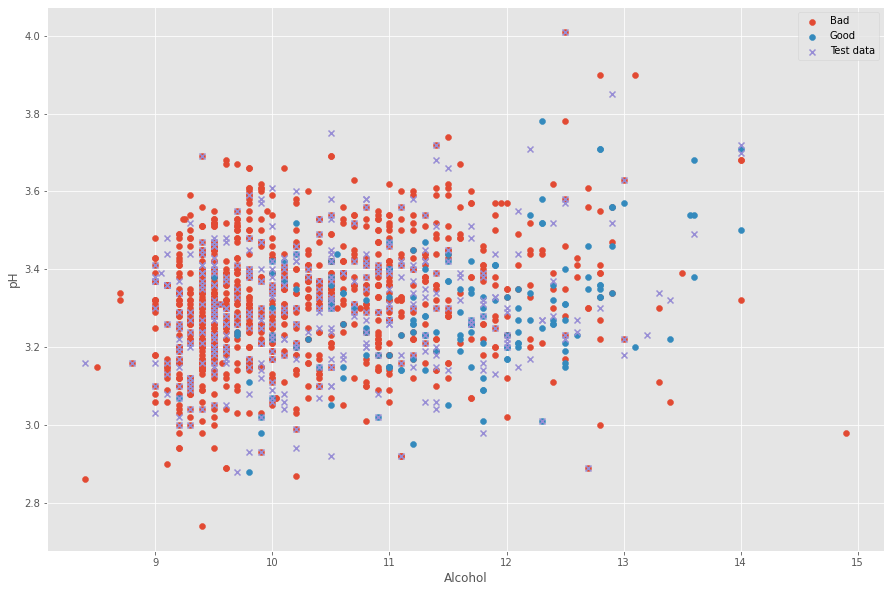

In [26]:
# Segregate the training data.
bad = train[train['quality'] == 'bad']
good = train[train['quality'] == 'good']

# New plot.
fig, ax = plt.subplots()

# Scatter plots for training data.
ax.scatter(bad['alcohol'], bad['pH'], marker='o', label='Bad')
ax.scatter(good['alcohol'], good['pH'], marker='o', label='Good')

# Scatter plot for testing data.
ax.scatter(test['alcohol'], test['pH'], marker='x', label='Test data')

# Show the legend.
ax.set_xlabel('Alcohol')
ax.set_ylabel('pH')
ax.legend();

<br>

### Two Dimensions: Inputs and Outputs

In [27]:
# Give the inputs and outputs convenient names.
inputs, outputs = train[['alcohol', 'pH']], train['quality']

In [28]:
# Peek at the inputs.
inputs.head()

alcohol    pH
211      10.0  3.35
168      10.4  3.47
1208     11.0  3.40
981      10.0  3.25
1503     11.0  3.51

In [29]:
# Peek at the outputs.
outputs.head()

211      bad
168      bad
1208    good
981      bad
1503     bad
Name: quality, dtype: category
Categories (2, object): ['bad' < 'good']

<br>

### Two Dimensions: Logistic Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [30]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [31]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['alcohol', 'pH']])
predictions

array(['bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad',
       'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad',
       'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad',
       'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad',
       'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad',
       'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad',
       'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad',
       'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad',
       'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad',
       'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad',
       'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad',
       'good', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad',
       'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad',
       'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad',
       'bad',

In [32]:
# Eyeball the misclassifications.
predictions == test['quality']

692      True
576      True
1176     True
114      True
167      True
        ...  
952     False
1428     True
1472     True
109      True
1192    False
Name: quality, Length: 400, dtype: bool

In [33]:
# What proportion were correct?
lre.score(test[['alcohol', 'pH']], test['quality'])

0.8725

<br>

### Two Dimensions: Misclassified

In [34]:
# Append a column to the test data frame with the predictions.
test['predicted'] = predictions
test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
692             8.6              0.49         0.51             2.0      0.422   
576             9.9              0.50         0.24             2.3      0.103   
1176            6.5              0.88         0.03             5.6      0.079   
114             7.8              0.56         0.19             1.8      0.104   
167             7.3              0.55         0.03             1.6      0.072   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
692                  16.0                  62.0  0.99790  3.03       1.17   
576                   6.0                  14.0  0.99780  3.34       0.52   
1176                 23.0                  47.0  0.99572  3.58       0.50   
114                  12.0                  47.0  0.99640  3.19       0.93   
167                  17.0                  42.0  0.99560  3.37       0.48   

      alcohol quality predicted  
692       9.0     bad       bad  
576      10.0     bad       bad  
1176     11.2     bad       bad  
114       9.5     bad       bad  
167       9.0     bad       bad

In [35]:
# Show the misclassified data.
misclass = test[test['predicted'] != test['quality']]
misclass

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
281             7.7             0.270         0.68             3.5      0.358   
855             7.6             0.735         0.02             2.5      0.071   
901             7.4             0.635         0.10             2.4      0.080   
1018            8.0             0.180         0.37             0.9      0.049   
836             6.7             0.280         0.28             2.4      0.012   
1088           11.6             0.410         0.54             1.5      0.095   
389             9.6             0.380         0.31             2.5      0.096   
946            10.2             0.440         0.58             4.1      0.092   
1086            8.5             0.340         0.40             4.7      0.055   
1035           10.1             0.370         0.34             2.4      0.085   
887            10.7             0.520         0.38             2.6      0.066   
1270            5.0             0.380         0.01             1.6      0.048   
444             5.3             0.570         0.01             1.7      0.054   
910             9.3             0.380         0.48             3.8      0.132   
8               7.8             0.580         0.02             2.0      0.073   
1119            5.6             0.660         0.00             2.5      0.066   
279             8.9             0.400         0.32             5.6      0.087   
903             6.8             0.590         0.06             6.0      0.060   
244            15.0             0.210         0.44             2.2      0.075   
335            11.9             0.695         0.53             3.4      0.128   
966             9.0             0.380         0.41             2.4      0.103   
1114            5.0             0.400         0.50             4.3      0.046   
929             8.7             0.330         0.38             3.3      0.063   
369             9.4             0.270         0.53             2.4      0.074   
875             8.8             0.310         0.40             2.8      0.109   
1043            9.5             0.390         0.41             8.9      0.069   
1090           10.0             0.260         0.54             1.9      0.083   
837             6.7             0.280         0.28             2.4      0.012   
1450            7.2             0.370         0.32             2.0      0.062   
1205            7.2             0.360         0.46             2.1      0.074   
206            12.8             0.300         0.74             2.6      0.095   
353            13.5             0.530         0.79             4.8      0.120   
1024            7.7             0.580         0.01             1.8      0.088   
413             9.9             0.400         0.53             6.7      0.097   
1070            9.3             0.330         0.45             1.5      0.057   
205            12.8             0.300         0.74             2.6      0.095   
1068           11.1             0.310         0.53             2.2      0.060   
1541            7.4             0.250         0.29             2.2      0.054   
366            12.8             0.615         0.66             5.8      0.083   
1031            7.3             0.550         0.01             1.8      0.093   
1279            9.8             0.300         0.39             1.7      0.062   
504            10.5             0.240         0.42             1.8      0.077   
330            10.2             0.360         0.64             2.9      0.122   
509            13.3             0.290         0.75             2.8      0.084   
657            12.0             0.500         0.59             1.4      0.073   
1133            7.2             0.480         0.07             5.5      0.089   
1162            8.5             0.320         0.42             2.3      0.075   
904             6.8             0.590         0.06             6.0      0.060   
902             7.4             0.635

In [36]:
# Eyeball the descriptive statistics for the species.
train.groupby('quality').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
bad           8.217971          0.546174     0.250464        2.540000   
good          8.775000          0.406982     0.373598        2.567073   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
bad       0.089766            15.946860             47.498068  0.996894   
good      0.075098            13.996951             34.628049  0.995965   

               pH  sulphates    alcohol  
quality                                  
bad      3.316628   0.646203  10.255588  
good     3.295854   0.747378  11.545224

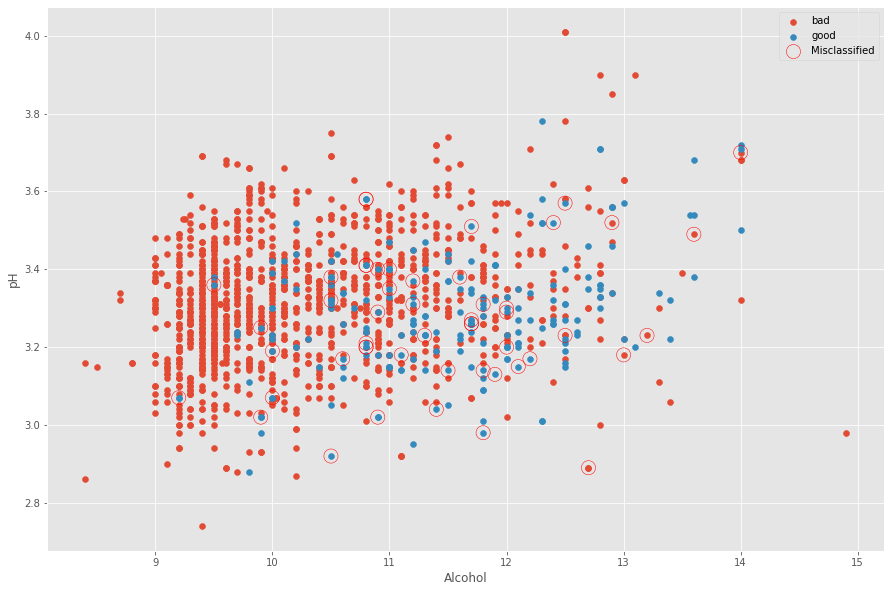

In [37]:
# New plot.
fig, ax = plt.subplots()

# Plot the training data
for species, data in df.groupby('quality'):
    ax.scatter(data['alcohol'], data['pH'], label=species)
    
# Plot misclassified.
ax.scatter(misclass['alcohol'], misclass['pH'], s=200, facecolor='none', edgecolor='r', label='Misclassified')

# Show the legend.
ax.set_xlabel('Alcohol')
ax.set_ylabel('pH')
ax.legend();

<br>

### Separating Setosa


***

From [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression):

$$\ell = \log_b \frac{p}{1-p} = \beta_0 + \beta_1 x_1 + \beta_2 x_2$$

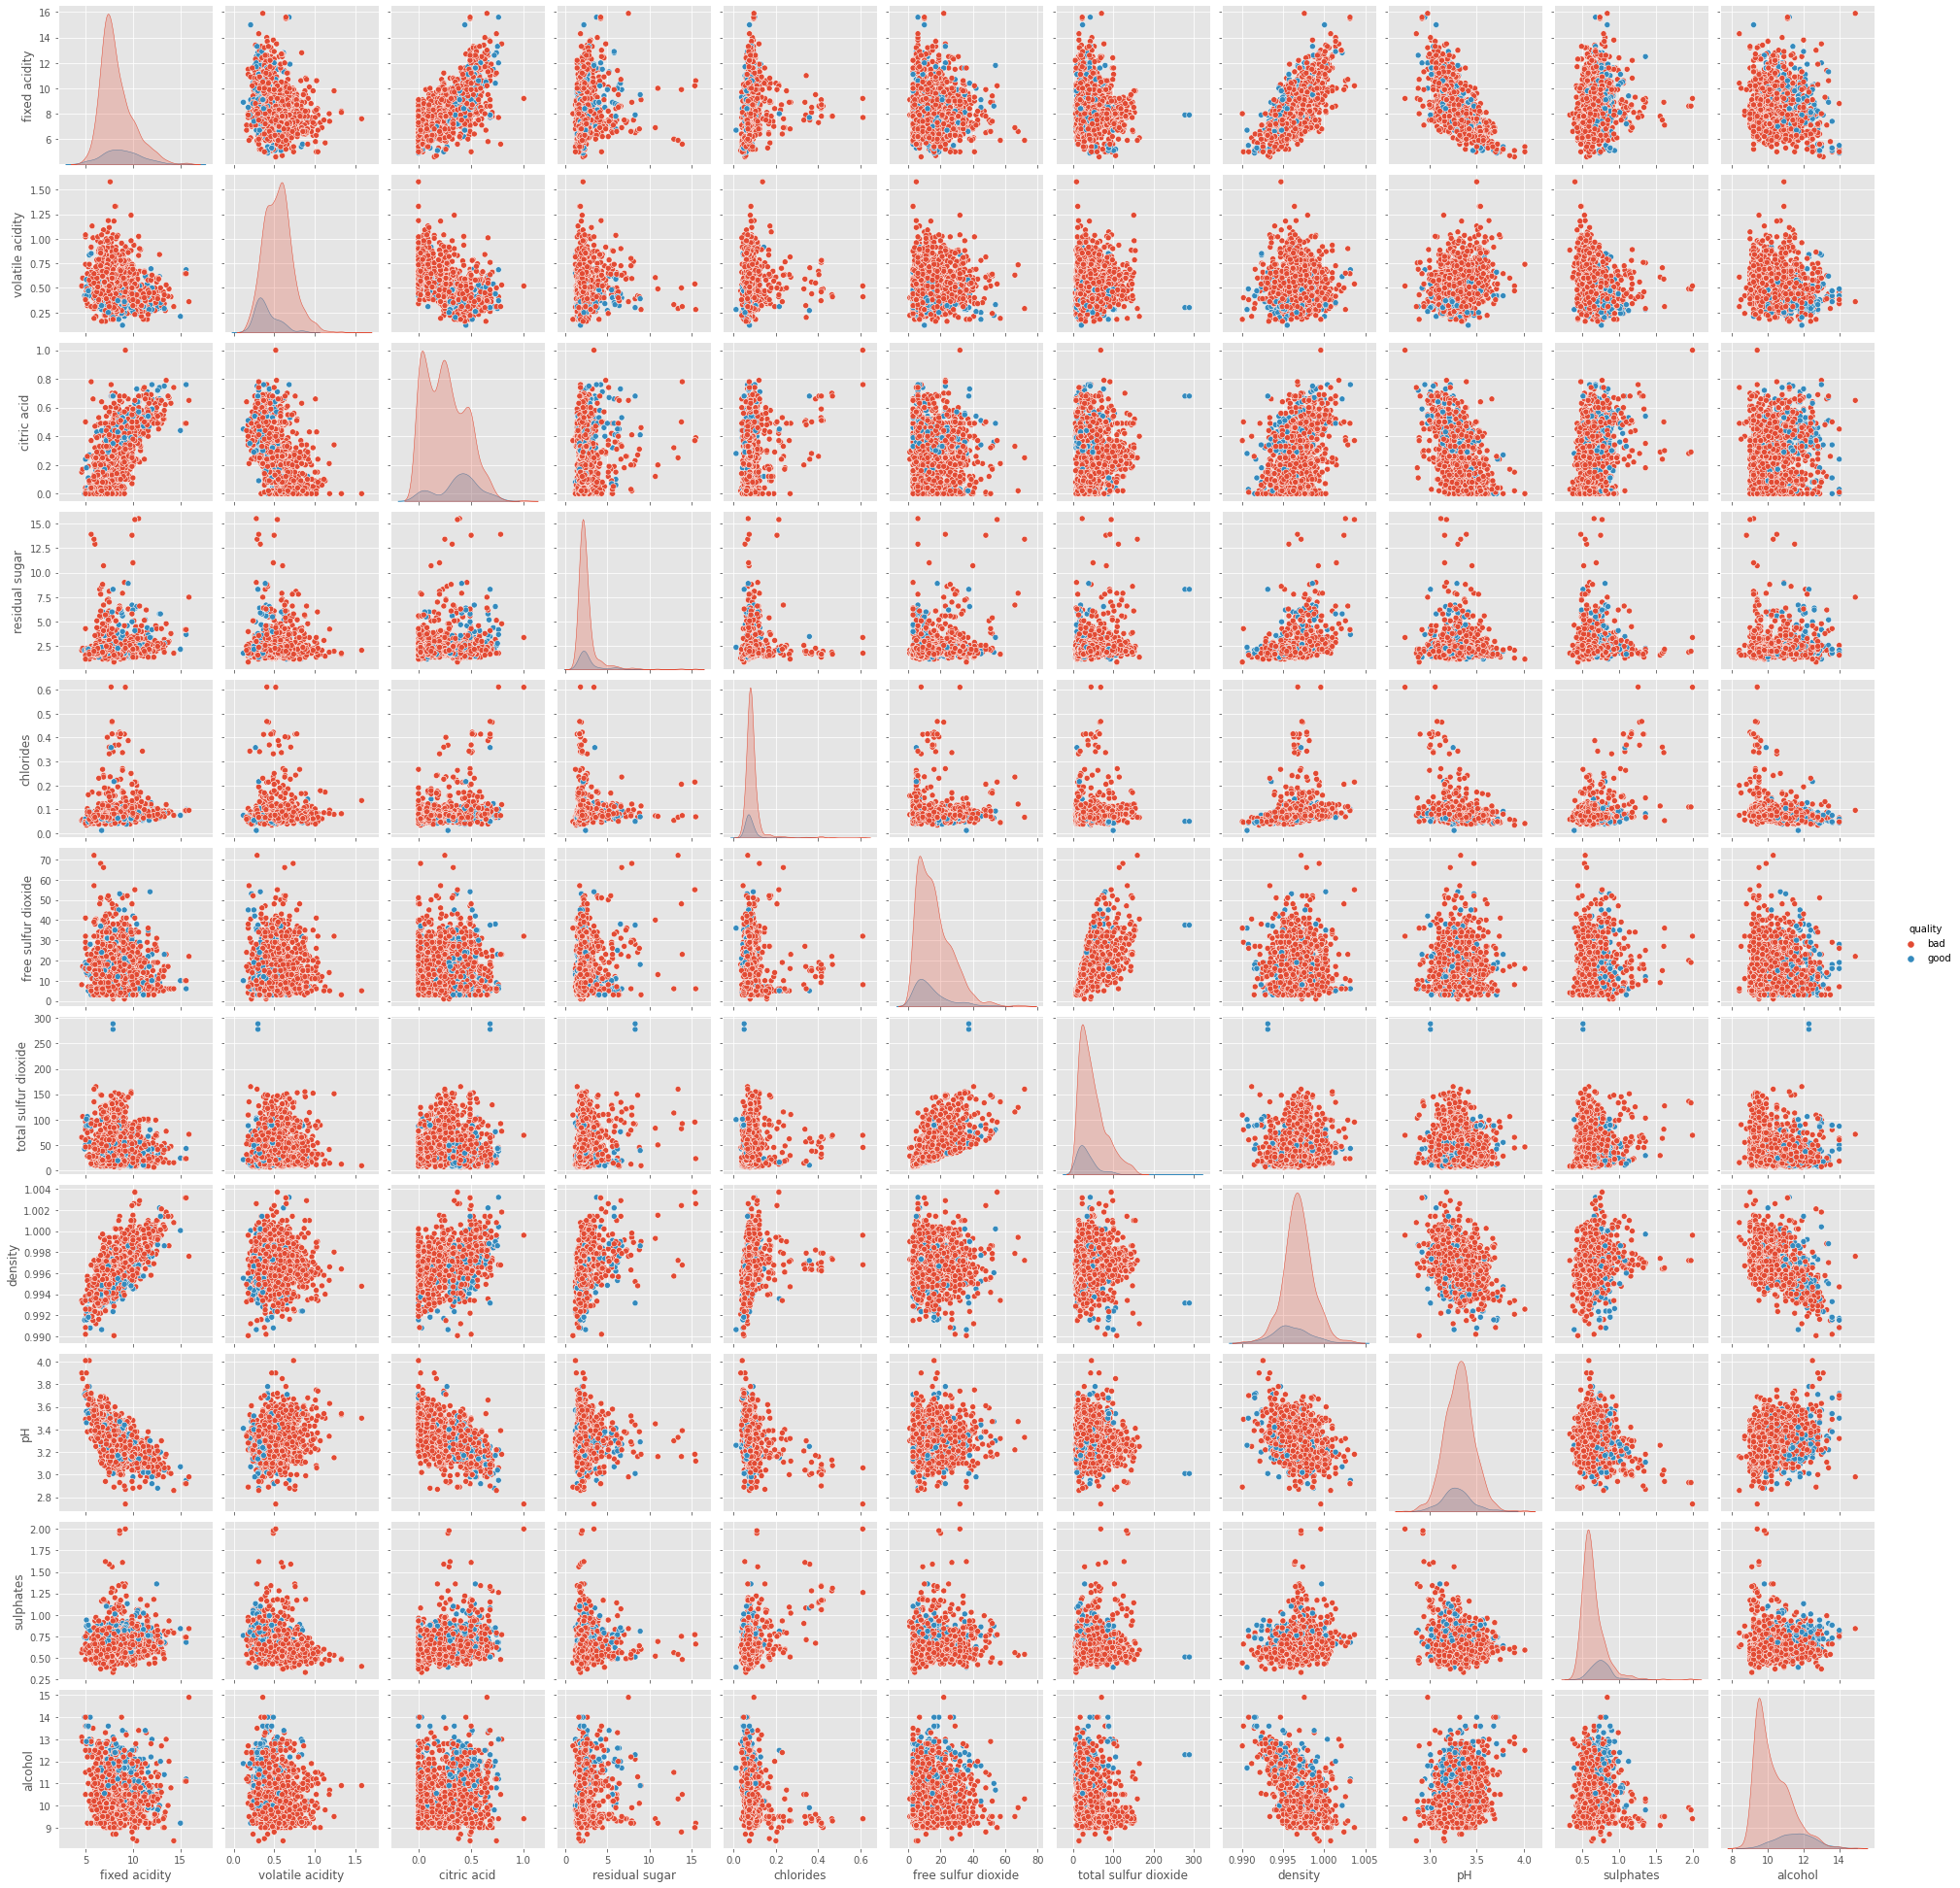

In [38]:
# Another look at this plot.
sns.pairplot(df, hue='quality');

In [39]:
# Give the inputs and outputs convenient names.
inputs = train[['alcohol', 'pH']]

# Set 'alcohol' and 'pH' to 'other'.
outputs = train['quality'].apply(lambda x: x if x == 'bad' else 'other')

# Eyeball outputs
outputs.unique()

['bad', 'other']
Categories (2, object): ['bad' < 'other']

In [40]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [41]:
actual = test['quality'].apply(lambda x: x if x == 'bad' else 'other')

# What proportion were correct?
lre.score(test[['alcohol', 'pH']], actual)

0.8725

<br>

### Using All Possible Inputs

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [42]:
# Load the red wine data set from a URL.
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [43]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [44]:
# Use all eleven possible inputs.
inputs, outputs = train[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], train['quality']

In [45]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0, max_iter=1000)

# Train the classifier on our data.
lre.fit(inputs, outputs)

c:\users\patri\appdata\local\programs\python\python39-32\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=0)

In [46]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
predictions

array([6, 5, 5, 5, 6, 6, 6, 5, 7, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5,
       6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5,
       5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6,
       7, 6, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5,
       6, 6, 6, 5, 5, 5, 5, 6, 7, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6,
       5, 5, 5, 7, 5, 6, 7, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5,
       6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 6,
       5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6,
       5, 6, 7, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5,
       5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 7, 6, 6, 6, 6, 5,
       6, 5, 6, 6, 5, 6, 7, 5, 6, 6, 6, 5, 5, 6, 6,

In [47]:
# Eyeball the misclassifications.
(predictions == test['quality']).value_counts()

True     228
False    172
Name: quality, dtype: int64

In [48]:
# What proportion were correct?
lre.score(test[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], test['quality'])

0.57

<br>

### $k$ Nearest Neighbours Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [49]:
# Load the red wine data set from a URL.
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [50]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [51]:
# Use all eleven possible inputs.
inputs, outputs = train[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], train['quality']

In [52]:
# Classifier.
knn = nei.KNeighborsClassifier()

In [53]:
# Fit.
knn.fit(inputs, outputs)

KNeighborsClassifier()

In [54]:
# Test.
knn.score(test[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']],  test['quality'])

c:\users\patri\appdata\local\programs\python\python39-32\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.495

In [55]:
# Predict.
predictions = lre.predict(test[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
(predictions == test['quality']).value_counts()

True     242
False    158
Name: quality, dtype: int64

In [56]:
# The score is just the accuracy in this case.
(predictions == test['quality']).value_counts(normalize=True)

True     0.605
False    0.395
Name: quality, dtype: float64

<br>

### Cross validation

https://scikit-learn.org/stable/modules/cross_validation.html

In [57]:
knn = nei.KNeighborsClassifier()
scores = mod.cross_val_score(knn, df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], df['quality'])
scores

c:\users\patri\appdata\local\programs\python\python39-32\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\patri\appdata\local\programs\python\python39-32\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\patri\appdata\local\programs\python\python39-32\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\patri\appdata\local\programs\python\python39-32\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\patri\appdata\local\programs\python\python39-32\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have val

array([0.446875  , 0.475     , 0.4625    , 0.390625  , 0.43573668])

In [58]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}")

Mean: 0.4421473354231975 	 Standard Deviation: 0.029022497910809644


In [59]:
lre = lm.LogisticRegression(random_state=0, max_iter=1000)
scores = mod.cross_val_score(lre, df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], df['quality'])
scores

c:\users\patri\appdata\local\programs\python\python39-32\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\patri\appdata\local\programs\python\python39-32\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

array([0.553125  , 0.540625  , 0.628125  , 0.5875    , 0.60815047])

In [60]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}")

Mean: 0.5835050940438872 	 Standard Deviation: 0.032790066871822246


### Regression Analysis: Vehicle Dataset

[Vehicle Dataset](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho) from [Kaggle](https://www.kaggle.com/).

This dataset contains information about used cars.

Using this data predict the sell price for the car.

***

#### Setup

In [61]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

In [62]:
# Plots styles.
plt.style.use('ggplot')

# Plot size.
plt.rcParams['figure.figsize'] = (12, 8)

<br>

#### Loading and Displaying

In [63]:
# Load the vehicle data set from a URL.
df = pd.read_csv("./car_data.csv")

In [64]:
# Display the data
df

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0  
2        Dealer       Manual      0  
3        Dealer       Manual      0  
4        Dealer       Manual      0  
..          ...          ...    ...  
296      Dealer       Manual      0  
297      Dealer       Manual      0  
298      Dealer       Manual      0  
299      Dealer       Manual      0  
300      Dealer       Manual      0  

[301 rows x 9 columns]

In [65]:
# Display attributes
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [66]:
# Display data overview
df.describe().T

count          mean           std      min      25%      50%  \
Year           301.0   2013.627907      2.891554  2003.00   2012.0   2014.0   
Selling_Price  301.0      4.661296      5.082812     0.10      0.9      3.6   
Present_Price  301.0      7.628472      8.644115     0.32      1.2      6.4   
Kms_Driven     301.0  36947.205980  38886.883882   500.00  15000.0  32000.0   
Owner          301.0      0.043189      0.247915     0.00      0.0      0.0   

                   75%       max  
Year            2016.0    2018.0  
Selling_Price      6.0      35.0  
Present_Price      9.9      92.6  
Kms_Driven     48767.0  500000.0  
Owner              0.0       3.0

In [67]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 16.5+ KB


<br>

#### Separating Columns

In [68]:
# The columns are made up of numerical and categorical data
# This code separates them into two lists.
all_cols = df.columns
numerical_cols = df._get_numeric_data().columns.to_list()
categorical_cols = list(set(all_cols) - set(numerical_cols))

In [69]:
# Display the two lists of cols
numerical_cols, categorical_cols

(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'],
 ['Car_Name', 'Seller_Type', 'Fuel_Type', 'Transmission'])

<br>
    
#### Clean Data

In [70]:
# Display the categorical cols
categorical_cols

['Car_Name', 'Seller_Type', 'Fuel_Type', 'Transmission']

In [71]:
# Display all unique data for each col in categorical_cols
[df[x].unique() for x in categorical_cols[:]]

[array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
        's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
        '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
        'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
        'camry', 'land cruiser', 'Royal Enfield Thunder 500',
        'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
        'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
        'Royal Enfield Thunder 350', 'KTM 390 Duke ',
        'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
        'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
        'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
        'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
        'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
        'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
        'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
        'TVS A

<b>Unique Values</b> <br>
Seller Type: Dealer / Individual <br>
Transmission: Manual / Automatic <br>
Fuel Type: Petrol / Diesel / CNG<br>
Car Name: Too many unique

In [72]:
# Drop car name
df.drop(['Car_Name'], inplace=True, axis=1)

In [73]:
# Check how many vehicles have CNG as fuel type
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [74]:
# Remove vehicles which use CNG from data
df = df[df['Fuel_Type'] != "CNG"]

In [75]:
# Successfully removed
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
Name: Fuel_Type, dtype: int64

In [76]:
# Display data
df

Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0    2014           3.35           5.59       27000    Petrol      Dealer   
1    2013           4.75           9.54       43000    Diesel      Dealer   
2    2017           7.25           9.85        6900    Petrol      Dealer   
3    2011           2.85           4.15        5200    Petrol      Dealer   
4    2014           4.60           6.87       42450    Diesel      Dealer   
..    ...            ...            ...         ...       ...         ...   
296  2016           9.50          11.60       33988    Diesel      Dealer   
297  2015           4.00           5.90       60000    Petrol      Dealer   
298  2009           3.35          11.00       87934    Petrol      Dealer   
299  2017          11.50          12.50        9000    Diesel      Dealer   
300  2016           5.30           5.90        5464    Petrol      Dealer   

    Transmission  Owner  
0         Manual      0  
1         Manual      0  
2         Manual      0  
3         Manual      0  
4         Manual      0  
..           ...    ...  
296       Manual      0  
297       Manual      0  
298       Manual      0  
299       Manual      0  
300       Manual      0  

[299 rows x 8 columns]

In [77]:
# Create a new column for the cars age
df['Car_Age'] = 2021 - df.Year
df.head()

C:\Users\patri\AppData\Local\Temp/ipykernel_38628/1651279583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Car_Age'] = 2021 - df.Year


Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0  2014           3.35           5.59       27000    Petrol      Dealer   
1  2013           4.75           9.54       43000    Diesel      Dealer   
2  2017           7.25           9.85        6900    Petrol      Dealer   
3  2011           2.85           4.15        5200    Petrol      Dealer   
4  2014           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  Car_Age  
0       Manual      0        7  
1       Manual      0        8  
2       Manual      0        4  
3       Manual      0       10  
4       Manual      0        7

In [78]:
# Remove Year column
df.drop(['Year'], inplace=True, axis=1)

c:\users\patri\appdata\local\programs\python\python39-32\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [79]:
# One Hot Encoding (categorical_cols)
df = pd.get_dummies(df, drop_first=True)
df

Selling_Price  Present_Price  Kms_Driven  Owner  Car_Age  \
0             3.35           5.59       27000      0        7   
1             4.75           9.54       43000      0        8   
2             7.25           9.85        6900      0        4   
3             2.85           4.15        5200      0       10   
4             4.60           6.87       42450      0        7   
..             ...            ...         ...    ...      ...   
296           9.50          11.60       33988      0        5   
297           4.00           5.90       60000      0        6   
298           3.35          11.00       87934      0       12   
299          11.50          12.50        9000      0        4   
300           5.30           5.90        5464      0        5   

     Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                   1                       0                    1  
1                   0                       0                    1  
2                   1                       0                    1  
3                   1                       0                    1  
4                   0                       0                    1  
..                ...                     ...                  ...  
296                 0                       0                    1  
297                 1                       0                    1  
298                 1                       0                    1  
299                 0                       0                    1  
300                 1                       0                    1  

[299 rows x 8 columns]

<br>

#### Find Correlation

In [80]:
df.corr().T

Selling_Price  Present_Price  Kms_Driven     Owner  \
Selling_Price                1.000000       0.879131    0.029546 -0.088741   
Present_Price                0.879131       1.000000    0.203665  0.007895   
Kms_Driven                   0.029546       0.203665    1.000000  0.089417   
Owner                       -0.088741       0.007895    0.089417  1.000000   
Car_Age                     -0.236047       0.047172    0.524285  0.182697   
Fuel_Type_Petrol            -0.551948      -0.473300   -0.173191  0.054102   
Seller_Type_Individual      -0.553425      -0.513733   -0.100885  0.123646   
Transmission_Manual         -0.366627      -0.348576   -0.163016 -0.049889   

                         Car_Age  Fuel_Type_Petrol  Seller_Type_Individual  \
Selling_Price          -0.236047         -0.551948               -0.553425   
Present_Price           0.047172         -0.473300               -0.513733   
Kms_Driven              0.524285         -0.173191               -0.100885   
Owner                   0.182697          0.054102                0.123646   
Car_Age                 1.000000          0.063754                0.041116   
Fuel_Type_Petrol        0.063754          1.000000                0.353865   
Seller_Type_Individual  0.041116          0.353865                1.000000   
Transmission_Manual    -0.000966          0.097468                0.065323   

                        Transmission_Manual  
Selling_Price                     -0.366627  
Present_Price                     -0.348576  
Kms_Driven                        -0.163016  
Owner                             -0.049889  
Car_Age                           -0.000966  
Fuel_Type_Petrol                   0.097468  
Seller_Type_Individual             0.065323  
Transmission_Manual                1.000000

<AxesSubplot:>

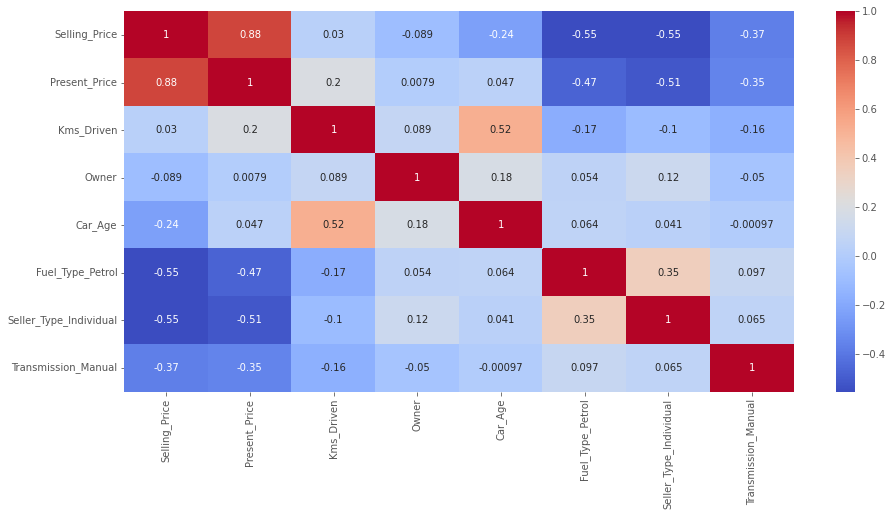

In [81]:
# Heatmap
corr = df.corr()
#Plot figsize
plt.figure(figsize=(15, 7))
# Generate heat map
sns.heatmap(corr,annot=True,cmap="coolwarm")

<br>

#### Regression on Two Cols

In [82]:
# Do regression on the selling price and present
np.polyfit(df['Selling_Price'], df['Present_Price'], 1)

array([1.49536191, 0.65064788])

In [83]:
# Create variables with those values
m, c = np.polyfit(df['Selling_Price'], df['Present_Price'], 1)
# Have a look at m and c
m, c

(1.495361909723574, 0.6506478809452334)

Text(0, 0.5, 'Present Price')

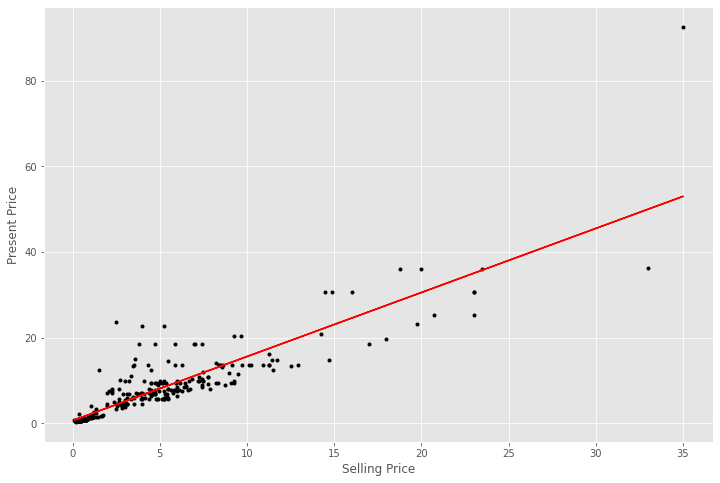

In [84]:
# Plot selling price and car age and the regression line in red
plt.plot(df['Selling_Price'], df['Present_Price'], 'k.')
plt.plot(df['Selling_Price'], m * df['Selling_Price'] + c, 'r-')
plt.xlabel("Selling Price")
plt.ylabel("Present Price")

In [85]:
# Set x, y to Selling_Price and Present_Price
x = df['Selling_Price']
y = df['Present_Price']

# Calculate mean x and mean y.
x_avg = np.mean(x)
y_avg = np.mean(y)

# Subtract means from x and y.
x_zero = x - x_avg
y_zero = y - y_avg

# Dot product of mean-adjusted x and y divided by dot product of mean adjusted x with itself.
m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)

# Subtract m times average x from average y.
c = y_avg - m * x_avg

# Let's have a look - same values as above.
m, c

(1.4953619097235746, 0.6506478809452334)

In [86]:
# Create y from a polynomial in x.
y =  2.0 * x * x + 5.0 * x + 1.0 + np.random.normal(0.0, 1.0, len(x))

In [87]:
# Look at y.
y

0       40.125396
1       70.812974
2      141.698718
3       32.325960
4       66.459248
          ...    
296    227.949332
297     49.459842
298     40.597703
299    322.751193
300     85.140721
Name: Selling_Price, Length: 299, dtype: float64

In [88]:
# Blindly try the regression - we get answers.
# Create variables with those values.
m, c = np.polyfit(x, y, 1)
# Have a look at m and c.
m, c

(48.82656614305644, -108.31666938870487)

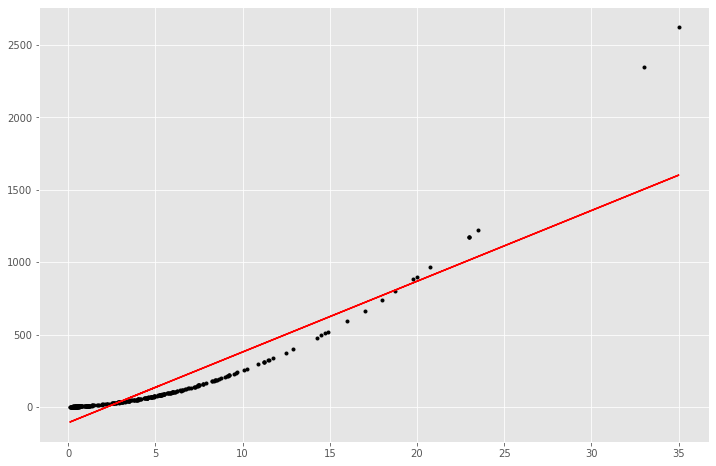

In [89]:
# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, m * x + c, 'r-')

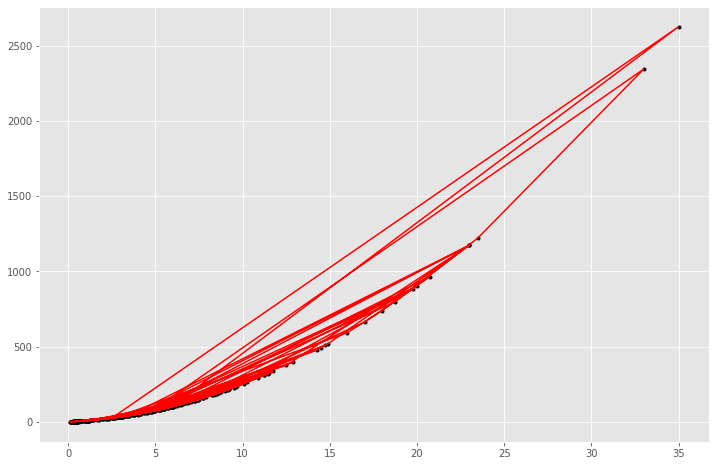

In [90]:
# Create variables with those values.
a, b, c = np.polyfit(x, y, 2)

# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x + b * x + c, 'r-')

<br>

#### Multiple Linear Regression

Multiple linear regression using sklearn. https://scikit-learn.org/stable/

In [91]:
# Import linear_model from sklearn.
import sklearn.linear_model as lm

In [92]:
# Create a linear regression model instance.
m = lm.LinearRegression()

In [93]:
df

Selling_Price  Present_Price  Kms_Driven  Owner  Car_Age  \
0             3.35           5.59       27000      0        7   
1             4.75           9.54       43000      0        8   
2             7.25           9.85        6900      0        4   
3             2.85           4.15        5200      0       10   
4             4.60           6.87       42450      0        7   
..             ...            ...         ...    ...      ...   
296           9.50          11.60       33988      0        5   
297           4.00           5.90       60000      0        6   
298           3.35          11.00       87934      0       12   
299          11.50          12.50        9000      0        4   
300           5.30           5.90        5464      0        5   

     Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                   1                       0                    1  
1                   0                       0                    1  
2                   1                       0                    1  
3                   1                       0                    1  
4                   0                       0                    1  
..                ...                     ...                  ...  
296                 0                       0                    1  
297                 1                       0                    1  
298                 1                       0                    1  
299                 0                       0                    1  
300                 1                       0                    1  

[299 rows x 8 columns]

<br>

#### X and Y

In [94]:
# Set y to the selling price and x to the rest of the data
x = df[['Car_Age', 'Kms_Driven', 'Present_Price']]
y = df.pop('Selling_Price')

In [95]:
x

Car_Age  Kms_Driven  Present_Price
0          7       27000           5.59
1          8       43000           9.54
2          4        6900           9.85
3         10        5200           4.15
4          7       42450           6.87
..       ...         ...            ...
296        5       33988          11.60
297        6       60000           5.90
298       12       87934          11.00
299        4        9000          12.50
300        5        5464           5.90

[299 rows x 3 columns]

In [96]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [97]:
# Ask our model to fit the data.
m.fit(x, y)

LinearRegression()

In [98]:
# Here's our intercept.
m.intercept_

4.24882394579598

In [99]:
# Here's our coefficients, in order.
m.coef_

array([-4.81290500e-01, -1.19785169e-06,  5.25525606e-01])

In [100]:
# See how good our fit is.
m.score(x, y)

0.8501171517801995

In [101]:
# Calculating the score by hand.
t, u, v = m.coef_
c = m.intercept_

y_avg = y.mean()

u = ((y - (t * x['Car_Age'] + u * x['Kms_Driven'] + v * x['Present_Price'] + c))**2).sum()
v = ((y - y.mean())**2).sum()

1 - (u/v)

0.8501171517801995

<br>

#### Using statsmodels

In [102]:
# Using statsmodels.
import statsmodels.api as sm

# Tell statmodels to include an intercept.
xwithc = sm.add_constant(x)

# Create a model.
msm = sm.OLS(y, xwithc)
# Fit the data.
rsm = msm.fit()
# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     557.7
Date:                Sun, 24 Oct 2021   Prob (F-statistic):          3.36e-121
Time:                        22:43:42   Log-Likelihood:                -627.06
No. Observations:                 299   AIC:                             1262.
Df Residuals:                     295   BIC:                             1277.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.2488      0.334     12.723

## Unsupervised Learning Algorithms

***